## Chapter 1.5: Creating models from scratch
***
So far we have shown the basics to create geological models by importing data from an external source (in especial GeoModeller 3D). In this chapter, we will explore the option available in GemPy to create the data directly in GemPy or to modify existing one. In this respect we will delve into the pandas DataFrames that contain the necessary data.

Let's start as always by importing the necessary dependencies:

In [1]:
# These two lines are necessary only if gempy is not installed
import sys, os
sys.path.append("../..")

# Importing gempy
import gempy as gp

# Embedding matplotlib figures into the notebooks
#%matplotlib inline


# Aux imports
import numpy as np
import pandas as pn
import matplotlib.pyplot as plt
import theano
import qgrid

In [2]:
#gp.save_model(geo_model, 'CreateModelTuto5', path=os.pardir+'/data/gempy_models')

In [3]:
if False:
    geo_model = gp.load_model('Tutorial_ch1-6_CreatingModels', path=os.pardir+'/data/gempy_models')
else:
    geo_model = gp.create_model('Tutorial_ch1-6_CreatingModels')
    gp.init_data(geo_model, [0, 1000, 0, 1000, -1000, 0], [50, 50, 50])
    geo_model.set_default_surfaces()
    geo_model.set_default_orientation()
    geo_model.add_surface_points(400, 300, -500, 'surface1')
    geo_model.add_surface_points(600, 300, -500, 'surface1')


Some default values but to make the model a bit faster but they are not necessary:

In [4]:
gp.set_interpolation_data(geo_model, theano_optimizer='fast_run',  verbose=[])

/home/miguel/anaconda3/lib/python3.6/site-packages/skcuda/cublas.py:283: UserWarning: creating CUBLAS context to get version number
  warnings.warn('creating CUBLAS context to get version number')


Compiling theano function...
Compilation Done!


,values
dtype,float64
output,geology
theano_optimizer,fast_run
device,cpu
verbosity,[]


In [5]:
geo_model.additional_data

values
Structure isLith                                                        True
          isFault                                                      False
          number faults                                                    0
          number surfaces                                                  1
          number series                                                    1
          number surfaces per series                                     [1]
          len surfaces surface_points                                    [2]
          len series surface_points                                      [2]
          len series orientations                                        [1]
Options   dtype                                                      float64
          output                                                     geology
          theano_optimizer                                          fast_run
          device                                                         cpu
          verbosity                                                       []
Kriging   range                                                      1732.05
          $C_o$                                                      71428.6
          drift equations                                                [3]
          nugget grad                                                   0.01
          nugget scalar                                                1e-06
Rescaling rescaling factor                                              1200
          centers                      [300.000005, 150.000005, -249.999995]

In [6]:
gp.compute_model(geo_model, debug=False,compute_mesh=False, sort_surfaces=False)


Lithology ids 
  [2. 2. 2. ... 1. 1. 1.] 

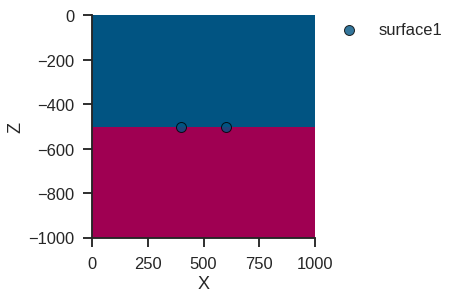

In [9]:
gp.plot.plot_section(geo_model, cell_number=25,
                         direction='y', show_data=True)


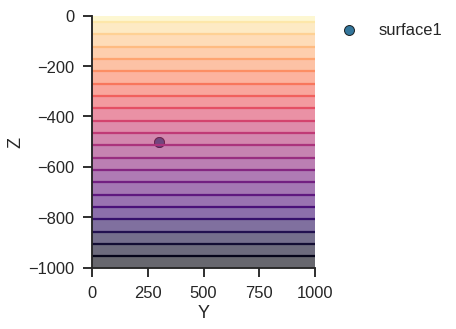

In [10]:
gp.plot.plot_scalar_field(geo_model, 25, direction='x', series=0)

In [11]:
vtk_object = gp.plot.plot_3D(geo_model, render_surfaces=True)

holding... Use vtk.resume to go back to the interactive window


In [34]:
vtk_object.resume()

holding... Use vtk.resume to go back to the interactive window


In [17]:
vtk_object.close_window()

In [12]:
vtk_object.real_time =True

## Passing the vtk object to qgrid

In [14]:
gp.activate_interactive_df(geo_model, vtk_object)

It is important to get df with get to update the models sinde the `activate_interactive` method is called

In [16]:
geo_model.qi.get('orientations')

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

0


/home/miguel/anaconda3/lib/python3.6/site-packages/vtk/util/numpy_support.py:137: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  assert not numpy.issubdtype(z.dtype, complex), \


0
0


/home/miguel/anaconda3/lib/python3.6/site-packages/vtk/util/numpy_support.py:137: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  assert not numpy.issubdtype(z.dtype, complex), \


1
1
0


/home/miguel/anaconda3/lib/python3.6/site-packages/vtk/util/numpy_support.py:137: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  assert not numpy.issubdtype(z.dtype, complex), \


0


In [17]:
geo_model.qi.get('surface_points')

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

1


/home/miguel/anaconda3/lib/python3.6/site-packages/vtk/util/numpy_support.py:137: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  assert not numpy.issubdtype(z.dtype, complex), \
/home/miguel/anaconda3/lib/python3.6/site-packages/vtk/util/numpy_support.py:137: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  assert not numpy.issubdtype(z.dtype, complex), \


3
2
AssertionError: Model not computed. Laking data in some surface


/home/miguel/anaconda3/lib/python3.6/site-packages/vtk/util/numpy_support.py:137: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  assert not numpy.issubdtype(z.dtype, complex), \


3
3
3
1
1
1
1
1
3
2
0
1
1
0
4
4
1
5
3
2


In [19]:
geo_model.qi.get('surfaces')

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [20]:
geo_model.qi.get('series')

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

CategoricalIndex(['Default series', 'series1'], categories=['Default series', 'series1', 'index', 'qgrid_unfiltered_index'], ordered=False, dtype='category')


In [21]:
geo_model.qi.get('faults')

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

Fault colors changed. If you do not like this behavior, set change_color to False.
Fault colors changed. If you do not like this behavior, set change_color to False.
Fault colors changed. If you do not like this behavior, set change_color to False.
Fault colors changed. If you do not like this behavior, set change_color to False.
Fault colors changed. If you do not like this behavior, set change_color to False.


In [22]:
geo_model.qi.get('faults_relations')

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

## Finite Fault parameters

In [32]:
geo_model.interpolator.theano_graph.not_l.set_value(1.)
vtk_object.update_model()

In [53]:
geo_model.interpolator.theano_graph.ellipse_factor_exponent.set_value(50)

In [56]:
vtk_object.update_model()

/home/miguel/anaconda3/lib/python3.6/site-packages/vtk/util/numpy_support.py:137: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  assert not numpy.issubdtype(z.dtype, complex), \


### Topography

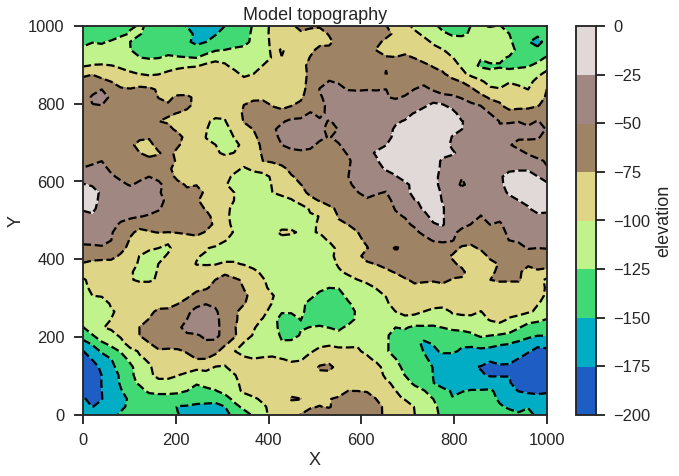

In [55]:
geo_model.set_topography(d_z=np.array([0,-200]))

In [57]:
geo_model.grid.active_grids

array([ True, False,  True, False])

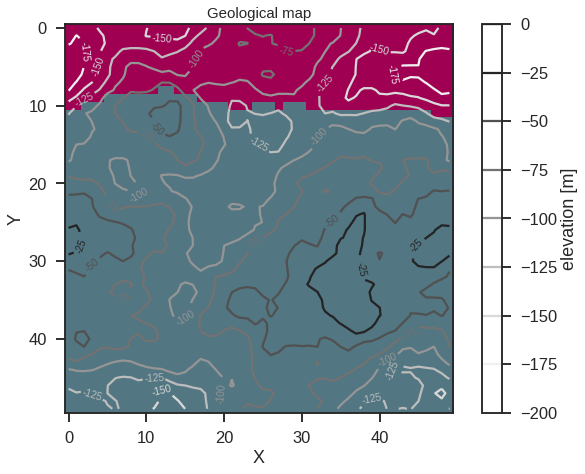

In [62]:
gp.plot.PlotData2D(geo_model).plot_map(geo_model.solutions)

In [61]:
vtk_object.render_topography()

/home/miguel/anaconda3/lib/python3.6/site-packages/vtk/util/numpy_support.py:137: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  assert not numpy.issubdtype(z.dtype, complex), \
